In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [8]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


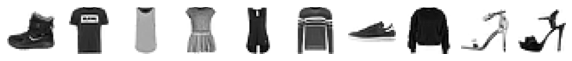

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize= (10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()
print([train_target[i] for i in range(10)])

In [12]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [19]:
# 로지스틱 회귀 전 전처리
train_scaled = train_input / 255.0  # 255로 나누어 전체 값을 0과 1 사이에 배치
train_scaled = train_scaled.reshape(-1, 28*28)

# 로지스틱 회귀
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss= 'log', max_iter= 5, random_state= 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
print(np.mean(scores['test_score']))

0.84365


In [20]:
# 텐서플로우 
import tensorflow as tf
from tensorflow import keras

# 딥러닝에서는 데이터셋의 크기가 너무 크기때문에 교차 검증을 사용하지 않는다.
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, \
    random_state= 42)

print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [28]:
# 밀집층 만들기
dense = keras.layers.Dense(10, activation= 'softmax', input_shape= (784,)) #뉴런의 개수, 뉴런 출력에 적용될 함수, 입력크기
model = keras.Sequential(dense)

# 모델 훈련 전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

# 모델 훈련
model.fit(train_scaled, train_target, epochs= 5) # 반복할 에포크 횟수

Epoch 1/5
1500/1500 [==============================] - 1s 343us/step - loss: 0.6075 - accuracy: 0.7940
Epoch 2/5
1500/1500 [==============================] - 1s 350us/step - loss: 0.4780 - accuracy: 0.8391
Epoch 3/5
1500/1500 [==============================] - 1s 347us/step - loss: 0.4562 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 1s 341us/step - loss: 0.4433 - accuracy: 0.8519
Epoch 5/5
1500/1500 [==============================] - 1s 345us/step - loss: 0.4368 - accuracy: 0.8555


In [29]:
# 모델 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 301us/step - loss: 0.4545 - accuracy: 0.8486


[0.4544500708580017, 0.8485833406448364]